In [7]:
#完成掷骰子
import random
import numpy as np
import pandas as pd
I=50000
dice_game = []
sround = []
for i in range(I):
    diceA = random.randint(1,6)
    diceB = random.randint(1,6)
    diceC = random.randint(1,6)
    sround = [diceA, diceB, diceC]
    dice_game.append(sround)
# print(dice_game)

In [48]:
dice_game_df = pd.DataFrame(dice_game,columns=["A","B","C"])
dice_game_df["sum"]=dice_game_df.apply(lambda x: x.sum(), axis=1)
# print(dice_game_df)

In [49]:
def result(one_row):
    if one_row[0]==one_row[1] and one_row[1]==one_row[2]:
        return "baozi"
    elif one_row["sum"] >= 11:
        return "big"
    else:
        return "small"
dice_game_df["result"]=dice_game_df.apply(result,axis=1)
# print(dice_game_df)

In [50]:
result_groupby = dice_game_df.groupby("result").size().reset_index(name="count")
sum_groupby = dice_game_df.groupby("sum").size().reset_index(name="count")
# print(result_groupby)
# print(sum_groupby)

In [51]:
result_groupby["per"] = result_groupby["count"].apply(lambda x: x/I)
sum_groupby["per"] = sum_groupby["count"].apply(lambda x:x/I)
# print(result_groupby)
# print(sum_groupby)

In [52]:
def baozi(one_row):
    if one_row["A"]==one_row["B"] and one_row["B"]==one_row["C"]:
        if one_row[0]==1:
            return "3x1"
        elif one_row[0]==2:
            return "3x2"
        elif one_row[0]==3:
            return "3x3"
        elif one_row[0]==4:
            return "3x4"
        elif one_row[0]==5:
            return "3x5"
        elif one_row[0]==6:
            return "3x6"
dice_baozi=dice_game_df[dice_game_df["result"]=="baozi"].reset_index()
del dice_baozi["index"]
# print(dice_baozi)
dice_baozi["baozi"]=dice_baozi.apply(baozi,axis=1)
# print(dice_baozi)
baozi_groupby=dice_baozi.groupby("baozi").size().reset_index(name="baozi_result")
baozi_groupby["per"]=baozi_groupby["baozi_result"].apply(lambda x:x/I)

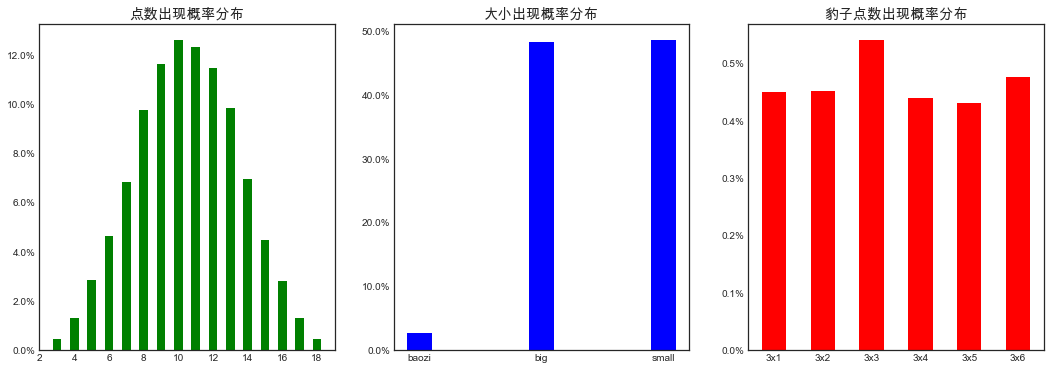

In [69]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
plt.style.use('seaborn-white')
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
fig=plt.figure(figsize=(18,6))
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)
y1=sum_groupby["per"].apply(lambda x:x*100)
x1=sum_groupby["sum"]
ax1.bar(x1,y1,0.5,color="g")
y2=result_groupby["per"].apply(lambda x:x*100)
x2=result_groupby["result"]
ax2.bar(x2,y2,0.2,color="b")
x2=baozi_groupby["baozi"]
y2=baozi_groupby["per"].apply(lambda x:x*100)
ax3.bar(x2,y2,0.5,color="r")
fmt='%.1f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
ax1.yaxis.set_major_formatter(yticks)
ax2.yaxis.set_major_formatter(yticks)
ax3.yaxis.set_major_formatter(yticks)
ax1.set_title(u"点数出现概率分布")
ax2.set_title(u"大小出现概率分布")
ax3.set_title(u"豹子点数出现概率分布")
plt.show()